# Download a novel and prepare for analysis

Some pre-processing: download novel from Gutenberg, then remove preamble and postamble

In [307]:
title = 'He Swallows Gold'
tit='Gold' #short title for future reference if needed
author = 'H. Bedford-Jones'
url = 'https://www.gutenberg.org/cache/epub/72871/pg72871.txt'
path = 'Data/'

In [308]:
import os
import urllib.request  # Import the module required for making HTTP requests

# Check if the file is stored locally
filename = path + title
if os.path.isfile(filename) and os.stat(filename).st_size != 0:
    print("{title} file already exists".format(title=title))
    with open(filename, 'r') as f:
        raw = f.read()
else:
    print("{title} file does not already exist. Grabbing from Project Gutenberg".format(title=title))
    response = urllib.request.urlopen(url)
    raw = response.read().decode('utf-8-sig')
    print("Saving {title} file".format(title=title))
    with open(filename, 'w') as outfile:
        outfile.write(raw)


He Swallows Gold file already exists


In the file browser to the left, open the book. The text should (might?) appear in a cell on the right. Delete preamble and postamble, then save.

In [309]:
##These two lines demonsrate that you have succeeded in removing the Guttenberg preamble and postamble

print(f"first 100 characters: {raw[:100]}")
print(f"last 100 characters: {raw[-100:]}")

first 100 characters: HE SWALLOWS GOLD    by H. Bedford-Jones          I      ï¿½We, all of us,ï¿½ said Huber Davis reflec
last 100 characters: obody  knew about that laboratory, except Li Mow Gee; and Mr. Li never boasted  of his methods.     


In [310]:
# first, remove unwanted new line and tab characters from the text
for char in ["\n", "\r", "\d", "\t"]:
   raw = raw.replace(char, " ")

with open(filename, 'w') as outfile:
    outfile.write(raw)

In [311]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\keega\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [312]:
all_tokens=word_tokenize(raw)#.lower())

In [313]:
all_tokens[60:80]

['respect',
 ',',
 'Carefrew',
 '.',
 'Thatï¿½s',
 'the',
 'way',
 'of',
 'a',
 'white',
 'man',
 '.',
 'A',
 'Chinaman',
 ',',
 'however',
 ',',
 'is',
 'just',
 'the']

In [314]:
clean_tokens=[word for word in all_tokens if word.isalpha()]

In [315]:
clean_tokens[60:80]

['just',
 'the',
 'opposite',
 'He',
 'does',
 'want',
 'to',
 'show',
 'his',
 'methods',
 'He',
 'does',
 'things',
 'in',
 'a',
 'damned',
 'mysterious',
 'way',
 'and',
 'he']

# Zipf's Law

[Zipf's Law Wiki](https://en.wikipedia.org/wiki/Zipf%27s_law)

In [316]:
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt

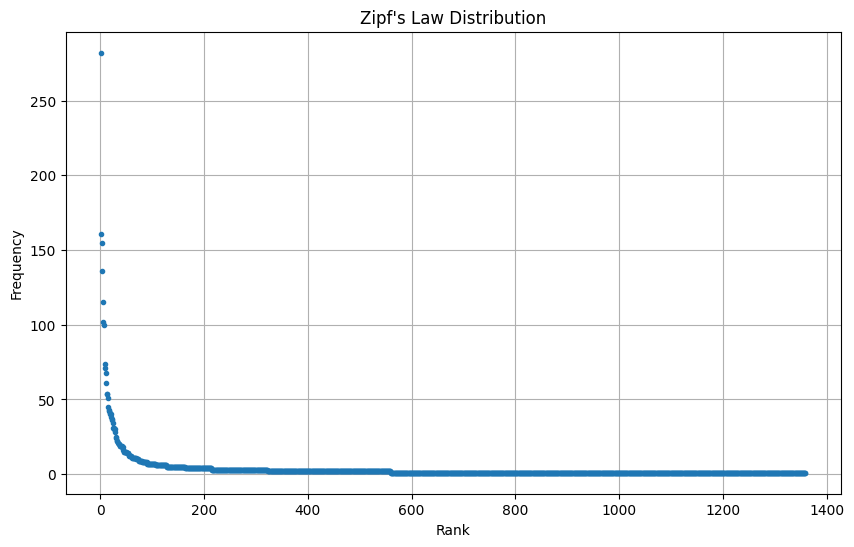

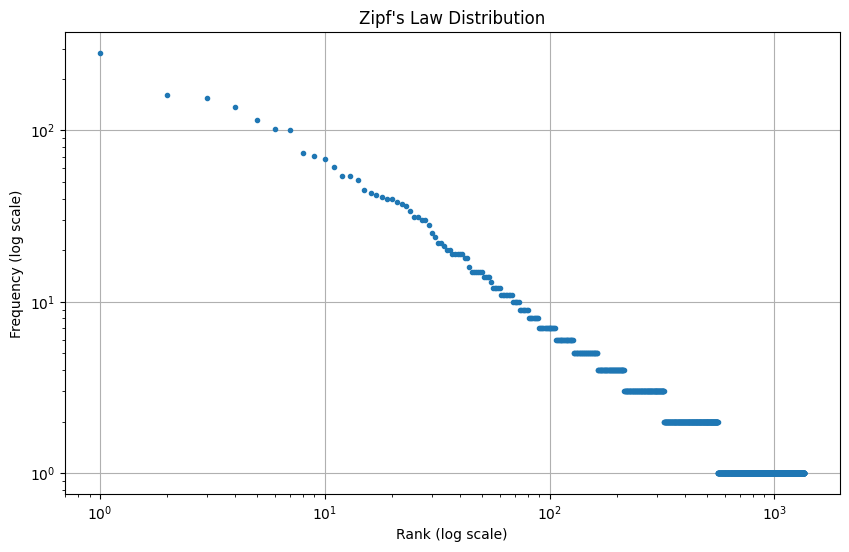

Estimated exponent 's' in Zipf's Law: 0.8586441932058855


In [317]:
##Zipf's Law
clean_tokens_lower = [word.lower() for word in clean_tokens]
word_frequencies = Counter(clean_tokens_lower)
sorted_frequencies = sorted(word_frequencies.values(), reverse=True)

# Create an array of ranks (1, 2, 3, ...)
ranks = np.arange(1, len(sorted_frequencies) + 1)


plt.figure(figsize=(10, 6))
plt.plot(ranks, sorted_frequencies, marker='.', linestyle='None')
plt.title("Zipf's Law Distribution")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot the data on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(ranks, sorted_frequencies, marker='.', linestyle='None')
plt.title("Zipf's Law Distribution")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.grid(True)
plt.show()

from scipy.stats import linregress

# Assuming you have already calculated ranks and sorted_frequencies as mentioned earlier
log_ranks = np.log(ranks)
log_frequencies = np.log(sorted_frequencies)

# Fit a linear regression model to the log-log data
slope, intercept, r_value, p_value, std_err = linregress(log_ranks, log_frequencies)

# The slope of the regression line represents the estimated exponent 's'
estimated_s = -slope

print(f"Estimated exponent 's' in Zipf's Law: {estimated_s}")

# Stopwords, wordcloud, hapaxes, lexical dispersion

In [318]:
from nltk.corpus import stopwords
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keega\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [319]:
stop_words=stopwords.words('english')

In [320]:
#Note that All_words is case sensitive (later will use all_words)
#A reason for this is to preserve capitalization of proper names in a word cloud
All_words = [word for word in clean_tokens if word.casefold() not in stop_words]

In [321]:
print(All_words[0:20])

['SWALLOWS', 'GOLD', 'us', 'said', 'Huber', 'Davis', 'reflectively', 'show', 'things', 'like', 'tell', 'people', 'methods', 'like', 'exposit', 'particular', 'way', 'managing', 'affairs', 'us']


In [322]:
All_fd=nltk.FreqDist(All_words)

In [323]:
All_fd

FreqDist({'Davis': 54, 'Carefrew': 54, 'Huber': 51, 'Li': 45, 'Mow': 42, 'Gee': 40, 'said': 34, 'candlestick': 22, 'would': 20, 'one': 17, ...})

In [324]:
All_fd.most_common(100)

[('Davis', 54),
 ('Carefrew', 54),
 ('Huber', 51),
 ('Li', 45),
 ('Mow', 42),
 ('Gee', 40),
 ('said', 34),
 ('candlestick', 22),
 ('would', 20),
 ('one', 17),
 ('man', 15),
 ('upon', 15),
 ('candles', 15),
 ('Chinese', 14),
 ('Ruth', 12),
 ('Sabang', 12),
 ('know', 12),
 ('little', 11),
 ('room', 11),
 ('like', 10),
 ('way', 10),
 ('Chang', 10),
 ('nothing', 9),
 ('old', 9),
 ('three', 9),
 ('red', 9),
 ('want', 8),
 ('never', 8),
 ('left', 8),
 ('took', 8),
 ('hands', 8),
 ('florins', 8),
 ('get', 7),
 ('knew', 7),
 ('business', 7),
 ('shop', 7),
 ('bamboo', 7),
 ('without', 7),
 ('eyes', 7),
 ('long', 7),
 ('could', 7),
 ('laid', 7),
 ('say', 7),
 ('sent', 6),
 ('Reginald', 6),
 ('good', 6),
 ('Reggy', 6),
 ('except', 6),
 ('also', 6),
 ('pipe', 6),
 ('candle', 6),
 ('thing', 6),
 ('men', 6),
 ('picked', 6),
 ('things', 5),
 ('white', 5),
 ('however', 5),
 ('Batavia', 5),
 ('got', 5),
 ('away', 5),
 ('many', 5),
 ('mind', 5),
 ('days', 5),
 ('back', 5),
 ('One', 5),
 ('certain', 5),


In [325]:
from wordcloud import WordCloud

In [326]:
wordcloud = WordCloud(width = 1000, height = 800,
                      background_color ='white',
                      max_words=200,
                      prefer_horizontal=0.5,
                      random_state=4,
                      contour_color='steelblue').generate_from_frequencies(All_fd)

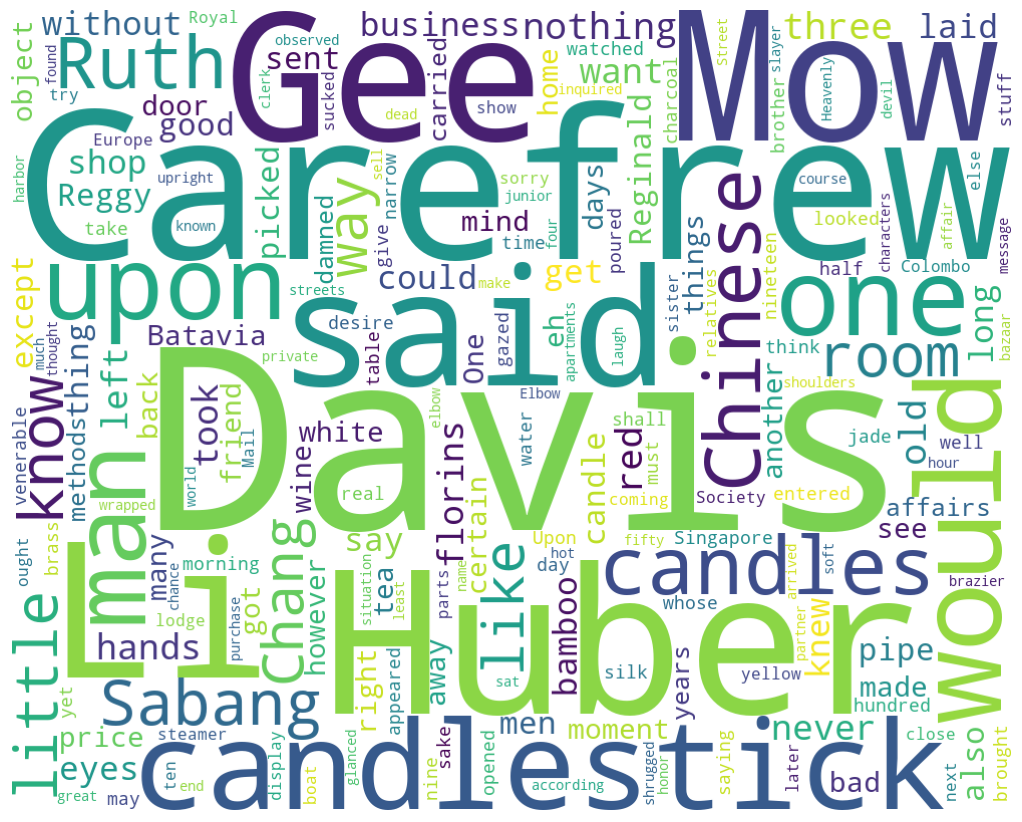

In [327]:
# plot the WordCloud image
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = -0.1)

plt.show()

In [328]:
#Now working with all words lower case
all_words = [word.lower() for word in All_words]

In [329]:
all_fd=nltk.FreqDist(all_words)

In [330]:
single_words=all_fd.hapaxes()

In [331]:
len(single_words)

794

In [332]:
import random

In [333]:
random.choices(single_words,k=20)

['satisfying',
 'use',
 'cynicism',
 'matter',
 'exclusively',
 'rites',
 'possibly',
 'laziness',
 'secret',
 'agency',
 'canons',
 'comes',
 'fire',
 'innocent',
 'life',
 'intended',
 'arrives',
 'expectations',
 'glaring',
 'busy']

In [334]:
Top_words = [word for (word, freq) in All_fd.most_common(10)]
print(Top_words)

['Davis', 'Carefrew', 'Huber', 'Li', 'Mow', 'Gee', 'said', 'candlestick', 'would', 'one']


In [335]:
from nltk.draw.dispersion import dispersion_plot

<Figure size 1200x900 with 0 Axes>

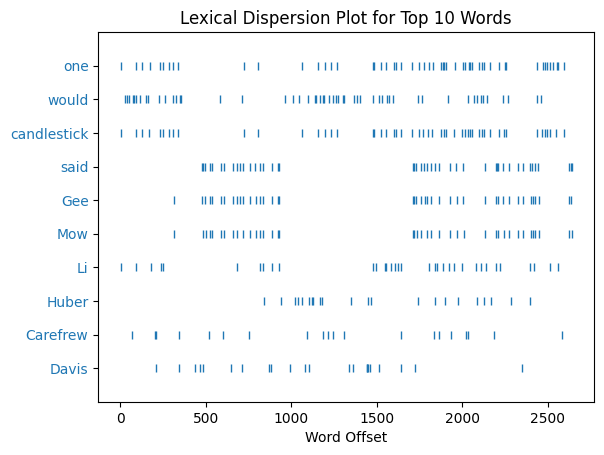

In [336]:
plt.figure(figsize=(12, 9))
dispersion_plot(All_words, Top_words, ignore_case=True, title='Lexical Dispersion Plot for Top 10 Words')
plt.show()

In [337]:
V = set(all_words)
long_words = [w for w in V if len(w) > 12]

In [338]:
long_words

['unimpassioned',
 'extraordinary',
 'consideration',
 'appurtenances',
 'apostrophized',
 'superstitions',
 'insignificance']

In [339]:
big_words=sorted(w for w in set(long_words) if len(w) > 10 and all_fd[w] > 7)
len(big_words)

0

In [340]:
print(big_words)

[]


<Figure size 1200x900 with 0 Axes>

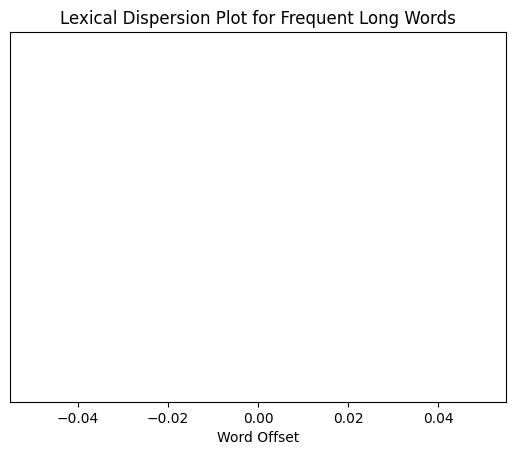

In [341]:
plt.figure(figsize=(12, 9))
dispersion_plot(all_words, big_words, ignore_case=True, title='Lexical Dispersion Plot for Frequent Long Words')
plt.show()

# Bigrams and Trigrams

In [342]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures


finder = BigramCollocationFinder.from_words(clean_tokens)



In [343]:
frequent_bigrams = finder.nbest(BigramAssocMeasures.raw_freq, 100)
print(frequent_bigrams)

[('Huber', 'Davis'), ('Li', 'Mow'), ('Mow', 'Gee'), ('of', 'the'), ('in', 'the'), ('of', 'his'), ('he', 'said'), ('to', 'the'), ('he', 'had'), ('that', 'the'), ('and', 'the'), ('did', 'not'), ('at', 'the'), ('of', 'a'), ('to', 'be'), ('with', 'a'), ('and', 'he'), ('in', 'his'), ('said', 'Li'), ('was', 'a'), ('Reginald', 'Carefrew'), ('had', 'been'), ('of', 'Li'), ('picked', 'up'), ('said', 'Huber'), ('the', 'candles'), ('the', 'three'), ('up', 'his'), ('was', 'not'), ('with', 'the'), ('Carefrew', 'had'), ('He', 'was'), ('a', 'little'), ('a', 'man'), ('about', 'the'), ('at', 'his'), ('for', 'a'), ('for', 'the'), ('from', 'the'), ('he', 'was'), ('into', 'the'), ('one', 'of'), ('the', 'candlestick'), ('the', 'room'), ('to', 'get'), ('upon', 'the'), ('want', 'to'), ('was', 'the'), ('way', 'of'), ('would', 'have'), ('Carefrew', 'was'), ('I', 'know'), ('It', 'was'), ('When', 'he'), ('a', 'candlestick'), ('a', 'few'), ('candlestick', 'of'), ('his', 'hands'), ('his', 'pipe'), ('in', 'a'), ('in

In [344]:
finder.apply_freq_filter(5)  # This filters out bigrams that occur less than 5 times
statistical_bigrams = finder.nbest(BigramAssocMeasures.raw_freq, 5)  # Adjust as needed
# also try bigram_measures.pmi, bigram_measures.chi_sq,likelihood_ratio,student_t,likelihood_ratio
statistical_bigrams


[('Huber', 'Davis'),
 ('Li', 'Mow'),
 ('Mow', 'Gee'),
 ('of', 'the'),
 ('in', 'the')]

In [345]:
len(statistical_bigrams)

5

In [346]:

from nltk import bigrams
from nltk.probability import ConditionalFreqDist

def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        # Get the most frequent next words (up to 3)
        next_words = list(cfdist[word].keys())[:3]
        if next_words:
            # Randomly choose from the top 3 words
            word = random.choice(next_words)
        else:
            break

# Your existing list of words
#clean_tokens = ["your", "list", "of", "word", "tokens", "here", "..."]  # Replace with your token list
# clean_tokens = all_words

# Generate bigrams from your list of words
clean_bigrams = bigrams(clean_tokens)

# Create a Conditional Frequency Distribution (CFD) from these bigrams
cfd = ConditionalFreqDist(clean_bigrams)

# Example usage
generate_model(cfd, 'The')  # Replace 'your_seed_word' with your desired starting word


The Chinese ways said coolly be sorry if you ruined a little about our friend 

In [347]:
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder



# Create a trigram measures object
trigram_measures = TrigramAssocMeasures()

# Create a Trigram finder
finder = TrigramCollocationFinder.from_words(clean_tokens)

# You can then find trigrams using different measures, e.g., by raw frequency
trigrams = finder.nbest(trigram_measures.raw_freq, 10)  # top 10 trigrams
# trigrams = finder.nbest(trigram_measures.pmi, 20)  # top 10 trigrams
# trigrams=finder.nbest(trigram_measures.likelihood_ratio,20)

# Print trigrams
for trigram in trigrams:
    print(trigram)


('Li', 'Mow', 'Gee')
('said', 'Li', 'Mow')
('of', 'Li', 'Mow')
('said', 'Huber', 'Davis')
('of', 'Huber', 'Davis')
('one', 'of', 'the')
('Mow', 'Gee', 'had')
('Mow', 'Gee', 'in')
('Mow', 'Gee', 'was')
('Street', 'of', 'the')


In [348]:
from nltk import trigrams


def generate_model(cfdist, word1, word2, num=15):
    print(word1, word2, end=' ')
    for i in range(num - 2):  # Adjust the range since two words are already printed
        next_words = list(cfdist[(word1, word2)].keys())[:3]
        if next_words:
            next_word = random.choice(next_words)
            print(next_word, end=' ')
            word1, word2 = word2, next_word
        else:
            break


# Your existing list of words
# clean_tokens = ["your", "list", "of", "word", "tokens", "here", "..."]

# Generate trigrams from your list of words
clean_trigrams = trigrams(clean_tokens)

# Create a Conditional Frequency Distribution (CFD) from these trigrams
cfd = ConditionalFreqDist(((w1, w2), w3) for w1, w2, w3 in clean_trigrams)

# Example usage, with two seed words
generate_model(cfd, 'of', 'us')  # Replace with your desired starting words


of us thinks he is a door in the same thing If you want an 

In [349]:
#

# Lemmmatization, contractions

First let's normalize contractions. So we hope to replace things like "let's" with "let us" and "can't" with "cannot", etc.

In [350]:
%pip install contractions
import contractions

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\keega\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [351]:
help(contractions)

Help on package contractions:

NAME
    contractions

PACKAGE CONTENTS
    data (package)
    test___init__

FUNCTIONS
    add(key, value)
    
    fix(s, leftovers=True, slang=True)
    
    get_combinations(tokens, joiners)
    
    intersperse(lst, item)
    
    preview(text, flank)
        Return all contractions and their location before fix for manual check. Also provide a viewing window to quickly
        preview the contractions in the text.
        :param text: texture.
        :param flank: int number, control the size of the preview window. The window would be "flank-contraction-flank".
        :return: preview_items, a list includes all matched contractions and their locations.

DATA
    comb = "you'd've"
    contractions_dict = {"'cause": 'because', "'em": 'them', "'tis": 'it i...
    json_open = b'{\n     "\'aight": "alright",\n     "abt": "ab...a": "wa...
    k = 'you’d’ve'
    leftovers_dict = {"'all": '', "'am": '', "'cause": 'because', "'coz": ...
    month = 'decemb

In [352]:
expanded_text = contractions.fix(raw)

In [353]:
# expanded_text

In [354]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\keega\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [355]:
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Assuming 'expanded_text' is your text after expanding contractions
# expanded_text = "Your expanded text here"

# Tokenize the text
tokens = word_tokenize(expanded_text)

# Lemmatize each word
lemmatized_text = ' '.join([lemmatizer.lemmatize(token) for token in tokens])

lemmatized_text


'HE SWALLOWS GOLD by H. Bedford-Jones I ï¿½We , all of u , ï¿½ said Huber Davis reflectively , ï¿½like to show off _how_ we do thing ; we like to tell people about our method ; we like to exposit our particular way of managing affair . Each of u think he is a little tin god in that respect , Carefrew . Thatï¿½s the way of a white man . A Chinaman , however , is just the opposite . He doe _not_ want to show his method . He doe thing in a damned mysterious way -- and he never tells.ï¿½ Carefrew sucked at his cigarette and eyed his brother-in-law with a sneer beneath his eyelid . Only a few hour previously Carefrew had landed from the coasting steamer , very glad indeed to get out of Batavia and part adjacent with a whole skin . His wife wa coming later , after she had straightened up his affair , and he would then hop aboard the Royal Mail liner with her , and voyage on to Colombo and Europe . Ruth Carefrew , however , knew little about the deal which had sent Carefrew himself up to Saba

In [356]:
lemmatized_text[30:200]

'-Jones I ï¿½We , all of u , ï¿½ said Huber Davis reflectively , ï¿½like to show off _how_ we do thing ; we like to tell people about our method ; we like to exposit our p'

In [357]:
all_tokens=word_tokenize(lemmatized_text)#.lower())

In [358]:
clean_tokens=[word for word in all_tokens if word.isalpha()]

In [359]:
print(clean_tokens[0:100])

['HE', 'SWALLOWS', 'GOLD', 'by', 'I', 'all', 'of', 'u', 'said', 'Huber', 'Davis', 'reflectively', 'to', 'show', 'off', 'we', 'do', 'thing', 'we', 'like', 'to', 'tell', 'people', 'about', 'our', 'method', 'we', 'like', 'to', 'exposit', 'our', 'particular', 'way', 'of', 'managing', 'affair', 'Each', 'of', 'u', 'think', 'he', 'is', 'a', 'little', 'tin', 'god', 'in', 'that', 'respect', 'Carefrew', 'the', 'way', 'of', 'a', 'white', 'man', 'A', 'Chinaman', 'however', 'is', 'just', 'the', 'opposite', 'He', 'doe', 'want', 'to', 'show', 'his', 'method', 'He', 'doe', 'thing', 'in', 'a', 'damned', 'mysterious', 'way', 'and', 'he', 'never', 'Carefrew', 'sucked', 'at', 'his', 'cigarette', 'and', 'eyed', 'his', 'with', 'a', 'sneer', 'beneath', 'his', 'eyelid', 'Only', 'a', 'few', 'hour', 'previously']


In [360]:
All_words = [word for word in clean_tokens if word.casefold() not in stop_words]

In [361]:
print(All_words[0:100])

['SWALLOWS', 'GOLD', 'u', 'said', 'Huber', 'Davis', 'reflectively', 'show', 'thing', 'like', 'tell', 'people', 'method', 'like', 'exposit', 'particular', 'way', 'managing', 'affair', 'u', 'think', 'little', 'tin', 'god', 'respect', 'Carefrew', 'way', 'white', 'man', 'Chinaman', 'however', 'opposite', 'doe', 'want', 'show', 'method', 'doe', 'thing', 'damned', 'mysterious', 'way', 'never', 'Carefrew', 'sucked', 'cigarette', 'eyed', 'sneer', 'beneath', 'eyelid', 'hour', 'previously', 'Carefrew', 'landed', 'coasting', 'steamer', 'glad', 'indeed', 'get', 'Batavia', 'part', 'adjacent', 'whole', 'skin', 'wife', 'wa', 'coming', 'later', 'straightened', 'affair', 'would', 'hop', 'aboard', 'Royal', 'Mail', 'liner', 'voyage', 'Colombo', 'Europe', 'Ruth', 'Carefrew', 'however', 'knew', 'little', 'deal', 'sent', 'Carefrew', 'Sabang', 'hurry', 'seem', 'know', 'lot', 'Chinese', 'way', 'said', 'Carefrew', 'ought', 'admitted', 'Huber', 'Davis', 'placidly']


In [362]:
All_fd=nltk.FreqDist(All_words)

In [363]:
All_fd

FreqDist({'wa': 74, 'Davis': 54, 'Carefrew': 54, 'Huber': 51, 'Li': 45, 'Mow': 42, 'Gee': 40, 'said': 34, 'candlestick': 23, 'candle': 21, ...})

In [364]:
wordcloud = WordCloud(width = 1000, height = 800,
                      background_color ='white',
                      max_words=200,
                      prefer_horizontal=0.5,
                      random_state=4,
                      contour_color='steelblue').generate_from_frequencies(All_fd)

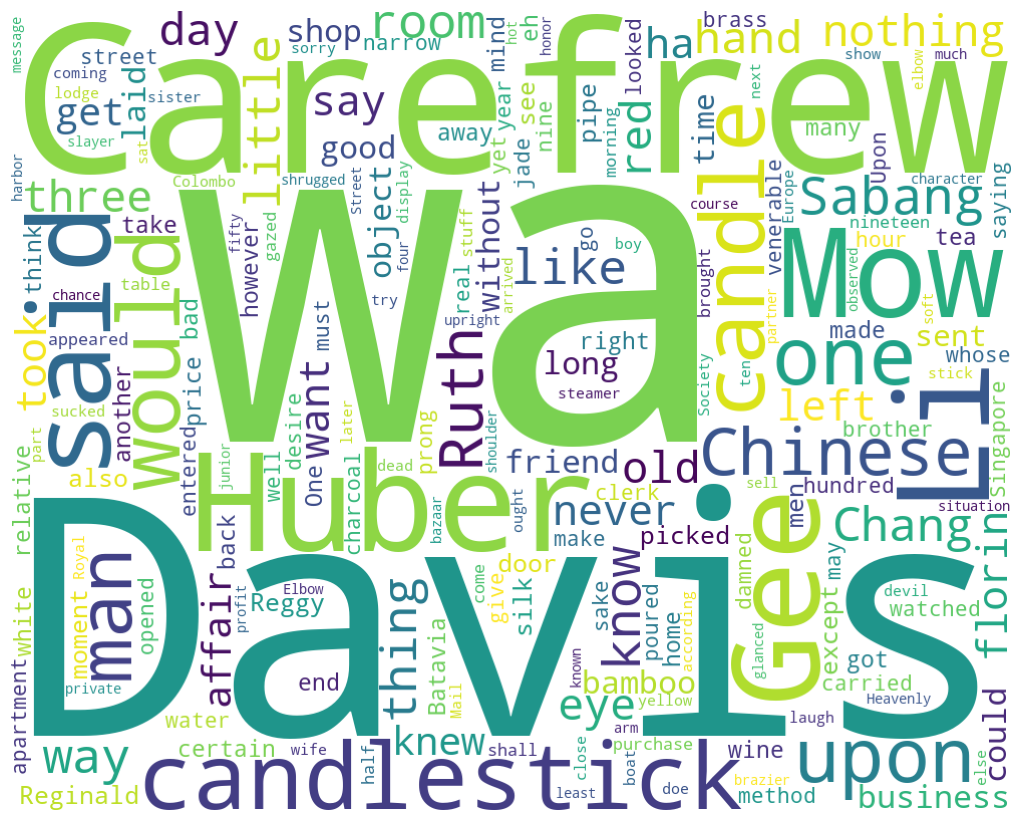

In [365]:
# plot the WordCloud image
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = -0.1)

plt.show()

In [366]:
Top_words = [word for (word, freq) in All_fd.most_common(10)]
print(Top_words)

['wa', 'Davis', 'Carefrew', 'Huber', 'Li', 'Mow', 'Gee', 'said', 'candlestick', 'candle']


<Figure size 1200x900 with 0 Axes>

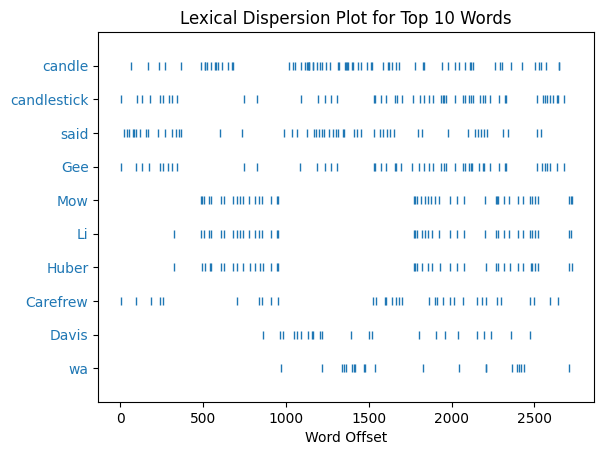

In [367]:
plt.figure(figsize=(12, 9))
dispersion_plot(All_words, Top_words, ignore_case=True, title='Lexical Dispersion Plot for Top 10 Words')
plt.show()